# Data Wrangling
## Problem Statement: 
Data Wrangling on Real Estate Market
## Dataset: 
"RealEstate_Prices.csv"
## Description:
The dataset contains information about housing prices in a specific real estate market. It includes various attributes such as property characteristics, location, sale prices, and other relevant features. The goal is to perform data wrangling to gain insights into the factors influencing housing prices and prepare the dataset for further analysis or modeling.
## Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import dataset

In [3]:
df = pd.read_csv("RealEstate_Prices.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Clean column names (just to be safe)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
print("Dataset Loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset Loaded. Shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


### 2. Handle missing values

In [7]:
print("\nMissing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# Impute missing numerical values with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
# Impute categorical values (if any) with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### 3. Data Merging

In [11]:
# Simulated neighborhood demographics dataset
neighborhood_data = {
    "ocean_proximity": ["<1H OCEAN", "INLAND", "NEAR OCEAN", "ISLAND"],
    "crime_rate": [2.1, 3.5, 1.8, 0.9],   # crimes per 1000 people
    "avg_school_rating": [7.5, 6.2, 8.1, 9.0]  # school quality out of 10
}
df_neighborhood = pd.DataFrame(neighborhood_data)

In [12]:
print("Mock Neighborhood Data:\n",df_neighborhood)

Mock Neighborhood Data:
   ocean_proximity  crime_rate  avg_school_rating
0       <1H OCEAN         2.1                7.5
1          INLAND         3.5                6.2
2      NEAR OCEAN         1.8                8.1
3          ISLAND         0.9                9.0


In [13]:
# Merge with your dataset based on ocean_proximity
df_merged = df.merge(df_neighborhood, on="ocean_proximity", how="left")

In [14]:
print("\n✅ After merging, dataset shape:", df_merged.shape)
print(df_merged.head())


✅ After merging, dataset shape: (20640, 12)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   crime_rate  avg_scho

### 4. Filter and subset
Example: houses with median_income > 2 and median_house_value < 500000


In [15]:
df_filtered = df[(df["median_income"] > 2) & (df["median_house_value"] < 500000)]

In [16]:
print("Filtered dataset shape:", df_filtered.shape)

Filtered dataset shape: (17209, 10)


### 5. Encode categorical variables

In [17]:
if "ocean_proximity" in df_filtered.columns:
    df_encoded = pd.get_dummies(df_filtered, columns=["ocean_proximity"], drop_first=True)
else:
    df_encoded = df_filtered.copy()

print("Categorical encoding complete. Shape:", df_encoded.shape)

Categorical encoding complete. Shape: (17209, 13)


### 6. Aggregate data

In [18]:
avg_price_by_proximity = df.groupby("ocean_proximity")["median_house_value"].mean().reset_index()
print("Average house value by ocean proximity:\n", avg_price_by_proximity)

Average house value by ocean proximity:
   ocean_proximity  median_house_value
0       <1H OCEAN       240084.285464
1          INLAND       124805.392001
2          ISLAND       380440.000000
3        NEAR BAY       259212.311790
4      NEAR OCEAN       249433.977427


### 7. Identify & handle outliers

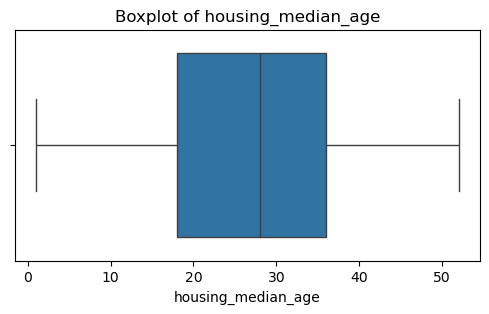

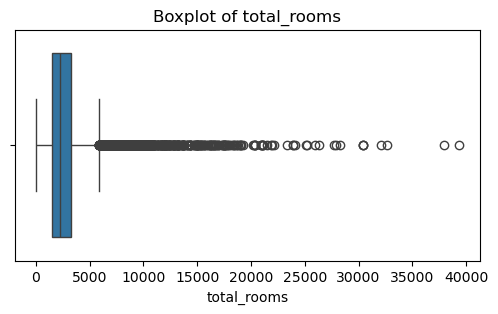

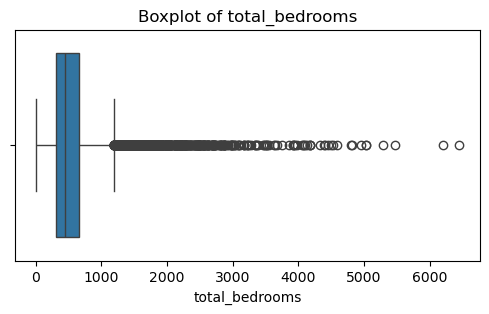

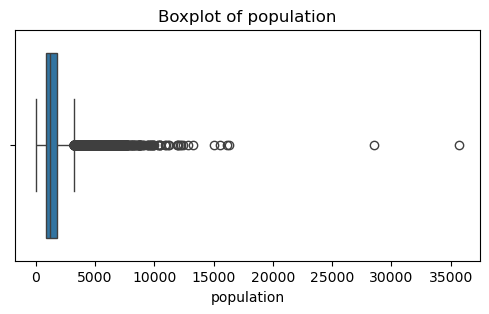

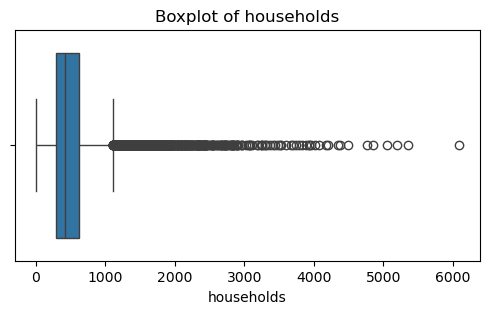

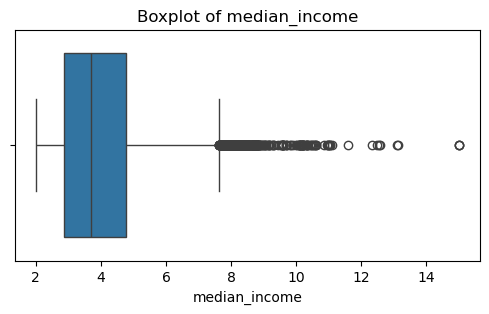

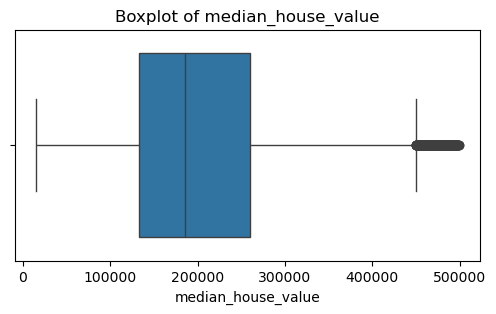

In [19]:
num_cols = ['housing_median_age','total_rooms','total_bedrooms',
            'population','households','median_income','median_house_value']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [20]:
# Outlier capping using IQR
for col in num_cols:
    Q1, Q3 = df_encoded[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_encoded[col] = np.where(df_encoded[col] > upper, upper, df_encoded[col])
    df_encoded[col] = np.where(df_encoded[col] < lower, lower, df_encoded[col])

print("Outlier handling complete.")

Outlier handling complete.


In [21]:
# Final dataset ready for modeling
print("Final dataset shape:", df_encoded.shape)
df_encoded.head()

Final dataset shape: (17209, 13)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,7.62625,450000.0,False,False,True,False
1,-122.22,37.86,21.0,5882.0,1106.0,2401.0,1112.0,7.62625,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.25740,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64310,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.84620,342200.0,False,False,True,False
